In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from City import *

df = pd.read_csv('zhvi-single-family-by-city.csv')

Most recent price: {'2022-10-31': '$384,434'}


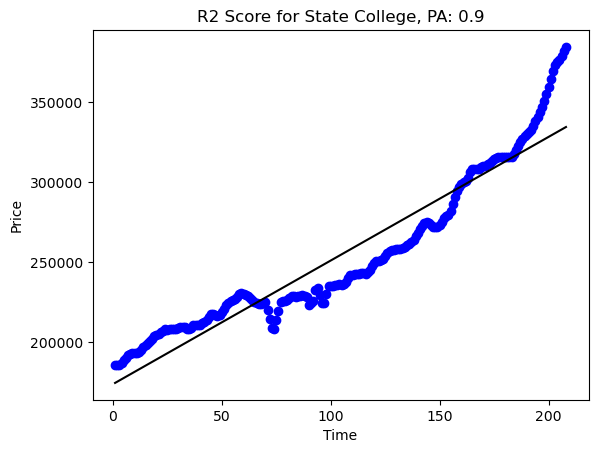

Linearity score (R2): 0.9


In [2]:
city = City('State College', 'PA', df)
print(f'Most recent price: {city.most_recent_price()}')
print(f'Linearity score (R2): {city.linearity_score(plot=True)}')

In [3]:
# TODO: extract this cell to pipeline

r2_scores = []

for i in tqdm(range(df.shape[0]), bar_format='{n_fmt}/{total_fmt} [{bar}] {percentage:3.0f}%'):
    city_nm = df.loc[i, 'RegionName']
    state_nm = df.loc[i, 'State']
    city = City(city_nm, state_nm, data = df)
    if city.num_pd > 2:
        r2 = city.linearity_score()
        r2_scores.append({'city': city_nm, 'state': state_nm, 'r2': r2})

r2_scores = pd.DataFrame(r2_scores).sort_values('r2', ascending=False)

22451/22451 [██████████] 100%


In [5]:
r2_scores.to_csv('r2_scores_by_city.csv')

Most recent price: {'2022-10-31': '$157,278'}


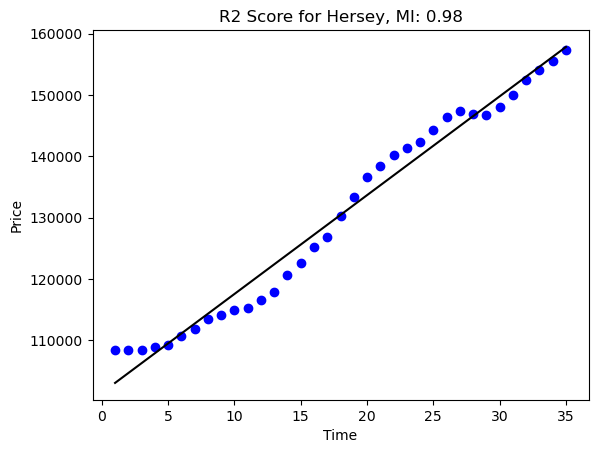

Linearity score (R2): 0.98


In [6]:
city = City('Hersey', 'MI', df)
print(f'Most recent price: {city.most_recent_price()}')
print(f'Linearity score (R2): {city.linearity_score(plot=True)}')

Next step: join with other criteria, such as city population, recent price, local economy and job market, quality of life ...